<div class="container" style="display:flex; width:100%;height:150px;background-color:None;">
    <div class="subcontainer-1" style="flex:0.15;height:100%;width:20%;">
        <div class="logo-frame" style="height:100%;background-color:None;">
            <img src="https://raw.githubusercontent.com/andikaaa18/Tripleten_datascience_project/main/Assets/logo_tripleten.png" style="height:100%;float:left; filter:invert(0%);">
        </div>
    </div>
    <div class="subcontainer-2" style="flex:0.89;height:60%;margin-top:3%">
        <div class="upper-sidebar" style="height:50%;width:100%;background-color:None;align-items:center;display:inline-flex;">
            <div style="font-size:50px; font-family:Trebuchet MS; font-weight:bold; text-align:left">
            Tripleten Indonesia Project
            </div>
        </div>
        <div class="lower-sidebar" style="height:50%;width:100%;background-color:None;align-items:center;display: inline-flex;">
            <div style="font-size:30px; font-family:Trebuchet MS;">
            &mdash; Sprint 7 : Pengantar Machine Learning
            </div>
        </div>
    </div>
</div>

<hr style="width:95%;height:2px;background-color:black;" align="left">

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:45px; text-align:left; line-height:50px">
Klasifikasi Pengguna Layanan Seluler untuk Mengoptimalkan Biaya Pemasaran Menggunakan <i>Supervised Learning</i><br> 
</div>

**Table of contents**<a id='toc0_'></a>    
- [**A. Pendahuluan**](#toc1_)    
  - [1) Deskripsi Proyek](#toc1_1_)    
  - [2) Tujuan dan Alur Proses](#toc1_2_)    
- [**B. Memuat Data**](#toc2_)    
- [**C. Ikhtisar Data**](#toc3_)    
- [**D. Analisa Data Eksploratif**](#toc4_)    
- [**E. Membangun Model *Machine-learning***](#toc5_)    
  - [1) *Feature Engineering*](#toc5_1_)    
    - [**Penanganan Outlier**](#toc5_1_1_)    
    - [**Membagi Dataset**](#toc5_1_2_)    
  - [2) *Model Tuning*](#toc5_2_)    
    - [**Decision Tree Classifier**](#toc5_2_1_)    
    - [**Random Forest Classifier**](#toc5_2_2_)    
    - [**Logistic Regression**](#toc5_2_3_)    
  - [3) *Model Testing*](#toc5_3_)    
- [**F. Kesimpulan**](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[**A. Pendahuluan**](#toc0_)

## <a id='toc1_1_'></a>[1) Deskripsi Proyek](#toc0_)

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:25px; padding-bottom:20px">Merekomendasikan pengguna lama untuk beralih ke paket baru</div>

<div style="margin-left:2%; width:95%; text-align:justify">

Kita bekerja pada sebuah perusahaan telekomunikasi bernama **Megaline**. Operator seluler **Megaline** merasa tidak puas karena sebagian besar pelanggan mereka masih menggunakan paket lama. Mereka ingin mengembangkan model yang bisa menganalisis perilaku konsumen dan mampu merekomendasikan salah satu dari paket terbaru **Megaline**, yaitu **Smart** atau **Ultra**.
</div>

## <a id='toc1_2_'></a>[2) Tujuan dan Alur Proses](#toc0_)

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">TUJUAN</div>
<div style="margin-left:2%; width:95%; text-align:justify">

Tujuan yang ingin dicapai pada proyek ini adalah menghasilkan model yang dapat memberikan rekomendasi paket dengan **akurasi 75% tepat** melalui sejumlah *feature* yang terdapat pada data perilaku pengguna. Melalui rekomendasi model, diharapkan pengguna lama melakukan migrasi dari paket lama menuju paket baru, yaitu **Smart** atau **Ultra**
</div>

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">ALUR PROSES</div>
<div style="margin-left:2%; width:95%;text-align:justify">

Adapun proses yang akan dilakukan dalam proses analis untuk proyek ini terdiri dari beberapa langkah utama, yaitu:
1. **Ikhtisar data.** <div> Pada bagian ini, data yang telah diimpor akan dipahami setiap parameter pada dataset serta menimbang kecukupan data dalam menjawab kebutuhan proyek.</div>        
2. **Analisa Data Eksploratif.** <div> Pada bagian ini, data yang telah dipersiapkan akan dilakukan sejumlah perhitungan statistik deskriptif dan menampilkan sejumlah visualisasi data untuk melihat pola-pola tertentu.</div>
3. **Membangun Model *Machine-learning*.** <div> Pada bagian ini akan dilakukan sejumlah proses, diantaranya: *feature engineering*, *model tuning* dan diakhiri dengan *model testing*.
</div>

</div>

# <a id='toc2_'></a>[**B. Memuat Data**](#toc0_)

* Memuat *library* dan data yang dibutuhkan.

In [2]:
# import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.patheffects as pe
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


# mengatur warning reports
# import warnings
# warnings.filterwarnings("ignore", "is_categorical_dtype")
# warnings.filterwarnings("ignore", "use_inf_as_na")

In [3]:
# import dataset
try:
    src = pd.read_csv("datasets/users_behavior.csv")
except:
    src = pd.read_csv("/datasets/users_behavior.csv")

# <a id='toc3_'></a>[**C. Ikhtisar Data**](#toc0_)

Menampilkan informasi dataset sumber dan sejumlah baris data.

In [4]:
# menampilkan informasi data dan baris data
src.info()
src.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
2935,88.0,642.31,170.0,44296.86,1
306,36.0,250.88,49.0,18965.02,0
554,58.0,390.87,0.0,22979.12,0
219,87.0,531.47,6.0,12498.45,0
1819,125.0,897.35,0.0,38910.01,1


Berikut merupakan dsekripsi untuk masing-masing fitur.

* `'сalls'` — jumlah panggilan
* `'minutes'` — total durasi panggilan dalam satuan menit
* `'messages'` — jumlah pesan teks
* `'mb_used'` — traffic penggunaan internet dalam satuan MB
* `'is_ultra'` — paket untuk bulan yang sedang berjalan (Ultra - 1, Smart - 0)


Data pada dataset di atas merupakan informasi konsumsi layanan setiap bulan untuk masing-masing pengguna yang menggunakan paket **Ultra** atau **Smart**. Berikut adalah penjelasan lebih rinci dari dataset terkait proyek.
* Tabel memiliki 5 fitur disertai 3214 observasi.
* `'is_ultra'` merupakan fitur target pada proyek ini.
* Perilaku pengguna akan dipelajari melalui sejumlah fitur seperti jumlah panggilan setiap bulan, total durasi panggilan setiap bulan, jumlah SMS yang dikirim setiap bulan dan konsumsi internet setiap bulan. Diharapkan, melalui fitur tersebut dapat dilakukan **klasifikasi paket mana yang tepat untuk masing-masing pengguna**.


# <a id='toc4_'></a>[**D. Analisa Data Eksploratif**](#toc0_)

Berikut di bawah ini merupakan deskripsi data penggunaan layanan seluler untuk pengguna paket **Smart** dan **Ultra**.

In [5]:
# Deskripsi data pengguna paket Smart
src[src['is_ultra']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
calls,2229.0,58.463437,25.939858,0.0,40.00,60.00,76.00,198.00
minutes,2229.0,405.942952,184.512604,0.0,274.23,410.56,529.51,1390.22
messages,2229.0,33.384029,28.227876,0.0,10.00,28.00,51.00,143.00
mb_used,2229.0,16208.466949,5870.498853,0.0,12643.05,16506.93,20043.06,38552.62
is_ultra,2229.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00


In [6]:
# Deskripsi data pengguna paket Ultra
src[src['is_ultra']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
calls,985.0,73.392893,43.916853,0.0,41.00,74.00,104.00,244.00
minutes,985.0,511.224569,308.031100,0.0,276.03,502.55,730.05,1632.06
messages,985.0,49.363452,47.804457,0.0,6.00,38.00,79.00,224.00
mb_used,985.0,19468.823228,10087.178654,0.0,11770.28,19308.01,26837.72,49745.73
is_ultra,985.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00


<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings & Insights</div>
<div style="margin-left:1%; width:97%; text-align:justify">

* Jumlah obsevasi yang terklasifikasi sebagai pengguna paket **Ultra** hanya sebesar 985 atau setara dengan proporsi 31% data keseluruhan. Jumlah data yang tidak seimbang pada **training dataset** akan mempengaruhi model dalam melakukan prediksi.
* Distribusi data pada seluruh fitur pengguna paket **Ultra** lebih tersebar dibandingkan pengguna paket **Smart**. Hal itu terlihat dari standard deviasi yang besar.
* Baik dari sisi nilai rata-rata atau median pada seluruh fitur, pengguna paket **Ultra** menunjukkan tingkat konsumsi layanan seluler yang lebih tinggi dari pada pengguna paket **Smart**.

</div>

Berikut di bawah ini akan di tampilkan boxplot dan histogram yang menunjukkan distribusi data penggunaan layanan oleh masing-masing pengguna paket **Smart** atau **Ultra** setiap bulannya.

In [7]:
# fungsi membuat plot gabungan (boxplot & histogram)
def box_hist_plot(df:pd.DataFrame, column:str, size:tuple,hue_col:str, width:int, title:str, xlabel:str, rot:int=None):
    fig, ax1 = plt.subplots(ncols=2, nrows=1, figsize=size)
    sns.boxplot(ax=ax1[0],data=df, x=column, hue=df[hue_col].astype('str'), palette=('#2A9D8F', '#D62828'),
                gap=0.3, showmeans=True, meanprops={"marker":"d","markerfacecolor":"white",
                                                    "markeredgecolor":"black","markersize":"6"})
    sns.histplot(ax=ax1[1], data=df, x=column, hue=hue_col, binwidth=width, palette=('#2A9D8F', '#D62828'))
    fig.suptitle(title, size=15)

    # value boxplot
    for elemen,num in zip(df[hue_col].unique(), [-0.2,0.2]):
        q1 = df[df[hue_col]==elemen][column].quantile(0.25)
        q2 = df[df[hue_col]==elemen][column].quantile(0.5)
        q3 = df[df[hue_col]==elemen][column].quantile(0.75)
        iqr = q3-q1
        top_whis = q3+1.5*iqr
        if q1-1.5*iqr>=0:
            bottom_whis = q1-1.5*iqr
        else:
            bottom_whis = 0
        y_position = num-0.18

        if elemen== df[hue_col].unique()[1]:
            color = '#D62828'
        elif elemen==df[hue_col].unique()[0]:
            color = '#2A9D8F'
        else:
            color='black'

        ax1[0].text(q1, y_position, int(q1), ha='center', va='center', c=color, weight='bold', size=12,
                path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
        ax1[0].text(q2, y_position, int(q2), ha='center', va='center', c=color, weight='bold', size=12,
                path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
        ax1[0].text(q3, y_position, int(q3), ha='center', va='center', c=color, weight='bold', size=12,
                path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
        ax1[0].text(top_whis, y_position, int(top_whis), ha='center', va='center', c=color, weight='bold', size=12,
                path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
        if bottom_whis>0:
            ax1[0].text(bottom_whis, y_position, int(bottom_whis), ha='center', va='center', c=color, weight='bold', size=12,
                    path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
        else:
            pass

    ax1[0].grid(alpha=0.8, linestyle='dashed')
    ax1[1].grid(alpha=0.8, linestyle='dashed')
    
    ax1[0].set_xlabel(xlabel, size=12)
    ax1[1].set_xlabel(xlabel, size=12)


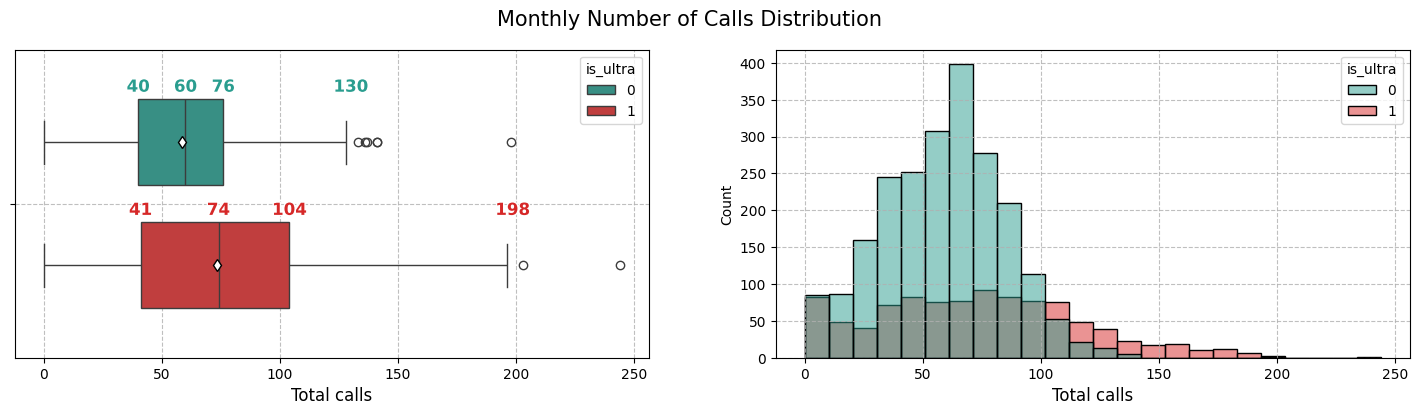

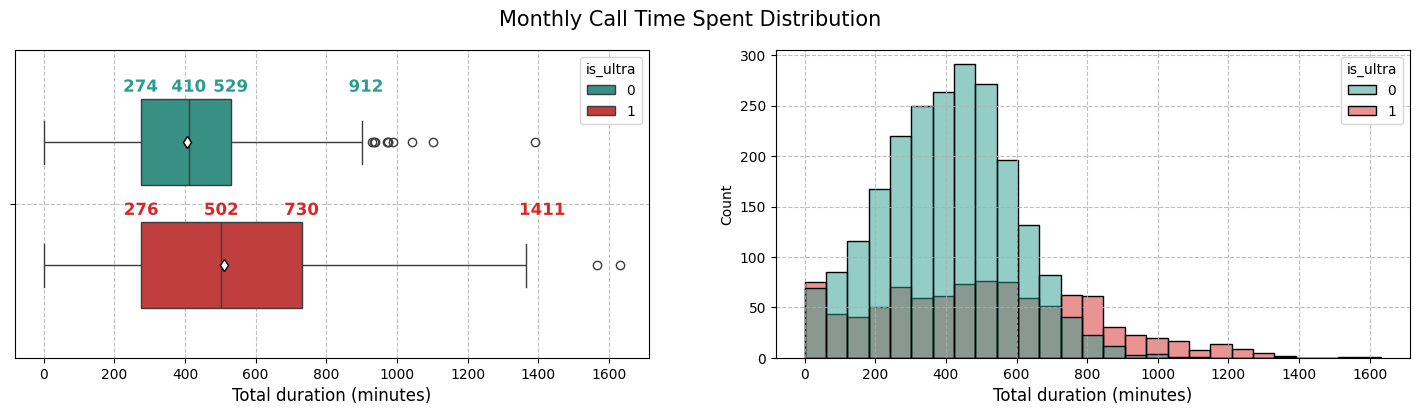

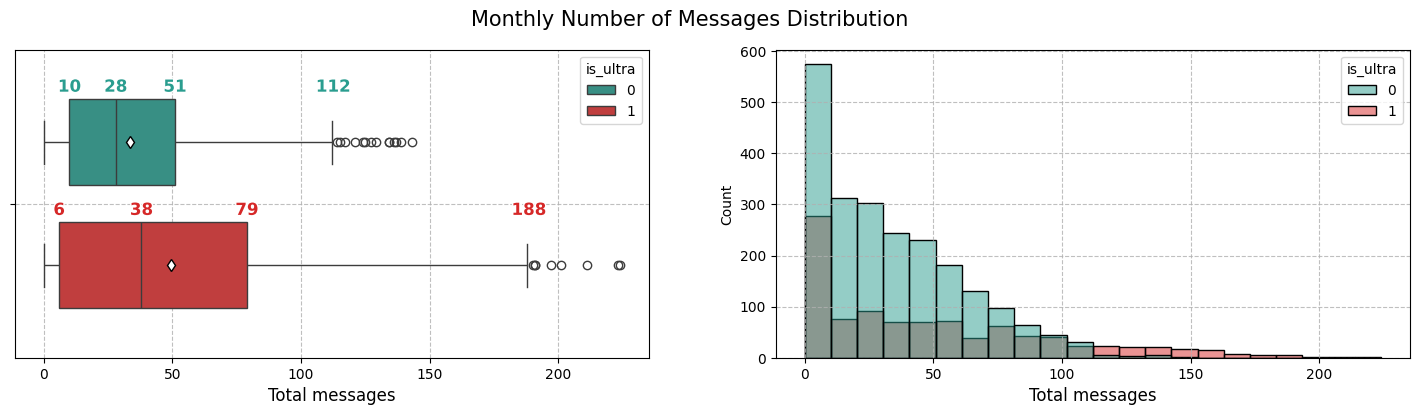

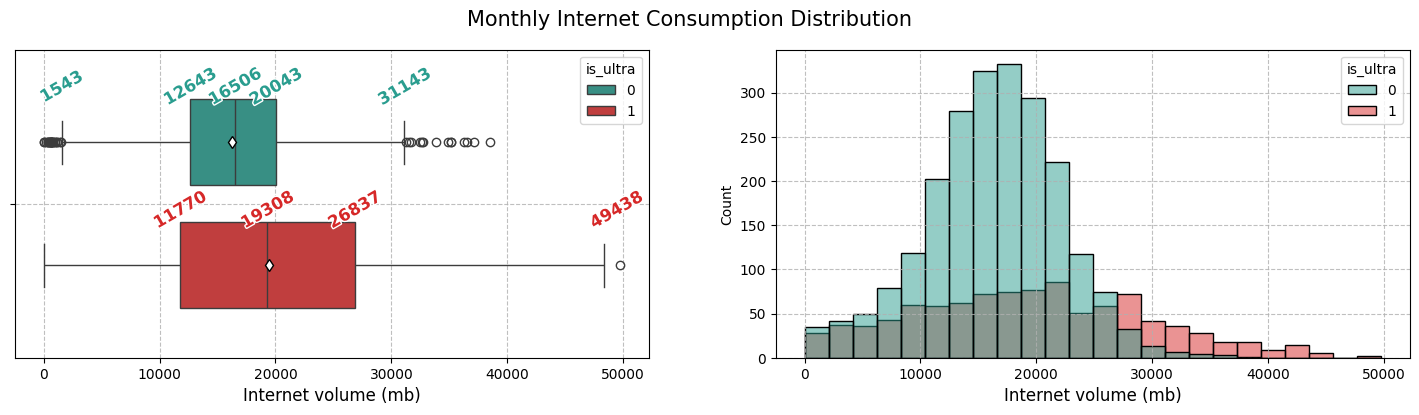

In [8]:
# Menampilkan distribusi data
box_hist_plot(src, 'calls', (18,4), 'is_ultra', 10, 'Monthly Number of Calls Distribution', 'Total calls')
box_hist_plot(src, 'minutes', (18,4), 'is_ultra', 60, 'Monthly Call Time Spent Distribution', 'Total duration (minutes)')
box_hist_plot(src, 'messages', (18,4), 'is_ultra', 10, 'Monthly Number of Messages Distribution', 'Total messages')
box_hist_plot(src, 'mb_used', (18,4), 'is_ultra', 2048, 'Monthly Internet Consumption Distribution', 'Internet volume (mb)', 30)

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings & Insights</div>
<div style="margin-left:1%; width:97%; text-align:justify">

* Data konsumsi layanan seluler pengguna paket **Ultra** memiliki jangkauan nilai yang luas dibandingkan pengguna paket **Ultra**.
* Untuk kedua klasifikasi pengguna, pada fitur jumlah panggilan, durasi panggilan dan konsumsi internet bulanan menunjukkan distribusi data yang simetris.
* Untuk kedua klasifikasi pengguna, pada fitur jumlah SMS yang dikirim setiap bulan menunjukkan distribusi data *right-skew*. Hal ini menunjukkan perilaku **pengguna yang tidak begitu aktif menggunakan layanan SMS**.
* Tipikal perilaku pengguna paket **Ultra**: 74 panggilan/bulan, 8 jam panggilan/bulan, 38 SMS/bulan dan 19 GB internet/bulan.
* Tipikal perilaku pengguna paket **Smart**: 60 panggilan/bulan, 7 jam panggilan/bulan, 28 SMS/bulan dan 16 GB internet/bulan.
* Ditemukan sejumlah *outlier* pada data. Terdapat sejumlah pengguna yang menggunakan layanan diluar kebiasaan umum, baik itu terlalu rendah atau terlalu tinggi. Terdapatnya *outlier* pada *training dataset* akan menghasilkan bias pada model yang dibangun.

</div>

Berikut di bawah ini, akan ditampilkan korelasi antar variabel untuk setiap pengguna paket prabayar, yaitu **Smart** atau **Ultra**. Korelasi antar variabel akan ditampilkan dalam bentuk *scatter plot* serta *heat map* dari korelasi *Pearson*.

Text(0.5, 1.03, "Scatter Plot Matrix for Users' Characteristics")

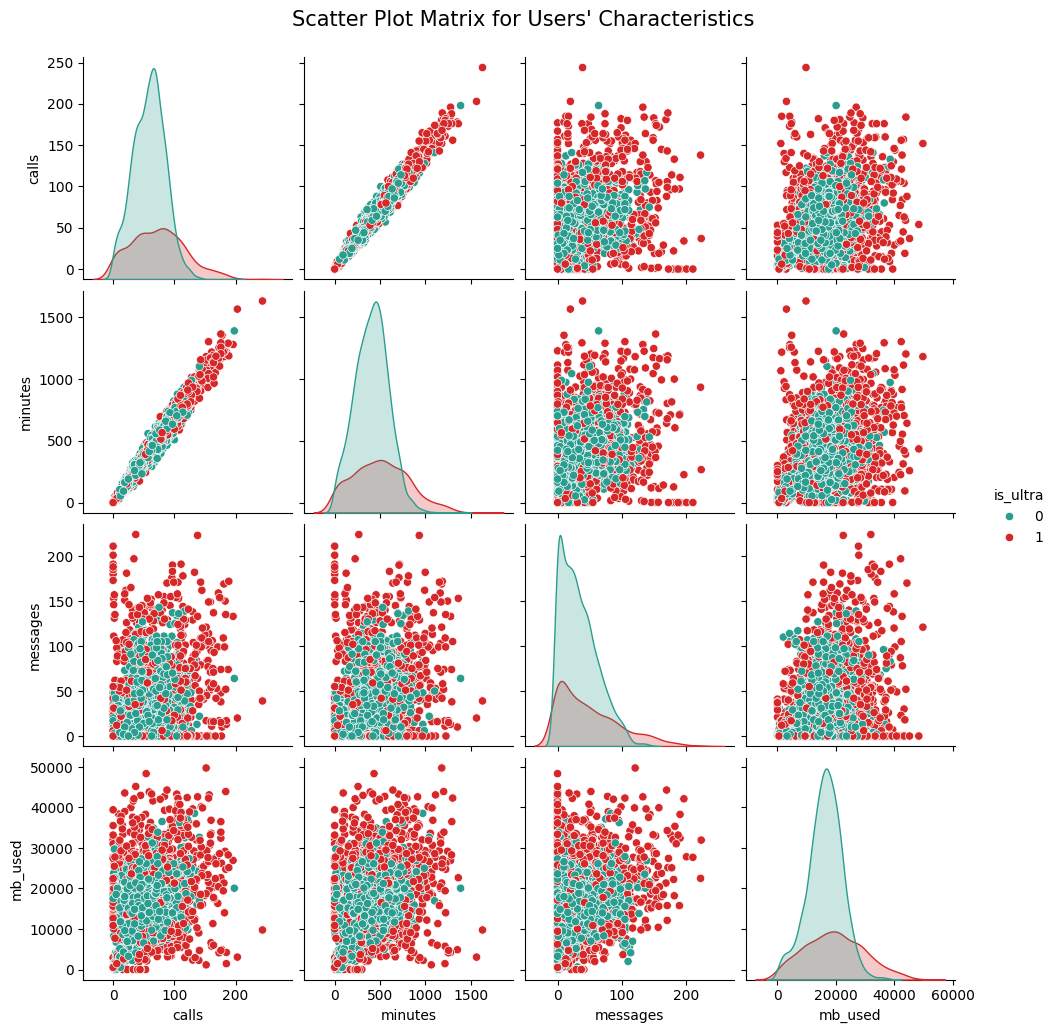

In [9]:
# Menampilkan scatter plot
sns.pairplot(data=src, hue='is_ultra', palette=('#2A9D8F', '#D62828'))
plt.suptitle("Scatter Plot Matrix for Users' Characteristics", y=1.03, size=15)

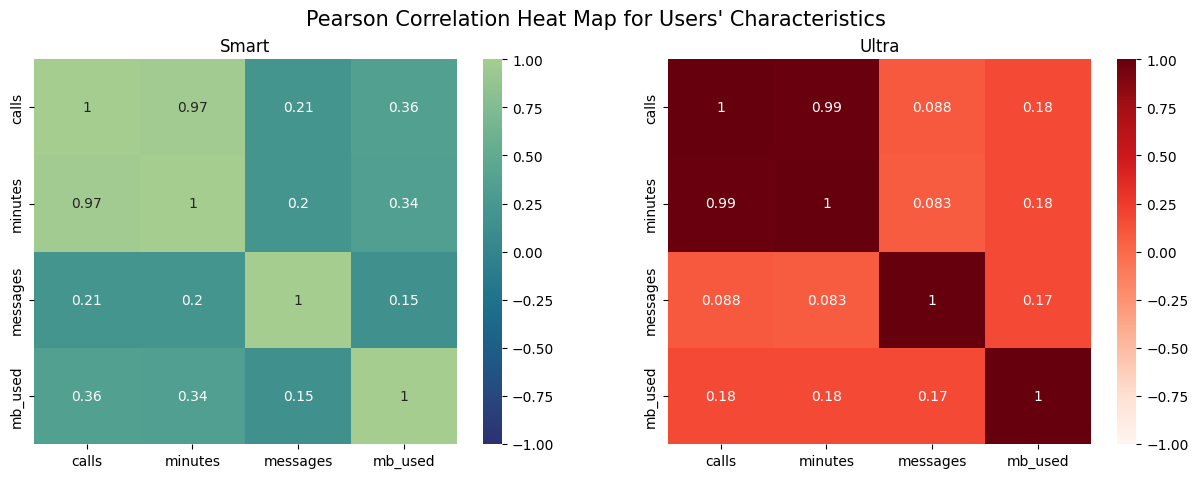

In [10]:
# Heat map matriks korelasi antar variabel
fig,ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(ax=ax[0], data=src.query("is_ultra==0").drop(columns=['is_ultra']).corr(), annot=True, 
            vmin=-1, vmax=1,cmap='crest_r')
sns.heatmap(ax=ax[1], data=src.query("is_ultra==1").drop(columns=['is_ultra']).corr(), annot=True, 
            vmin=-1, vmax=1, cmap='Reds')
ax[0].set_title("Smart", size=12)
ax[1].set_title("Ultra", size=12)
plt.suptitle("Pearson Correlation Heat Map for Users' Characteristics", size=15)
plt.show()

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings & Insights</div>
<div style="margin-left:1%; width:97%; text-align:justify">

* Untuk kedua klasifikasi pengguna, jumlah panggilan dan durasi panggilan memiliki korelasi yang sangat kuat.
* Pada pengguna paket **Smart**, fitur jumlah panggilan, durasi panggilan, konsumsi internet dan jumlah pengiriman pesan memiliki korelasi antar parameter yang lebih kuat dibandingkan pengguna paket **Ultra**.

</div>

# <a id='toc5_'></a>[**E. Membangun Model *Machine-learning***](#toc0_)

## <a id='toc5_1_'></a>[1) *Feature Engineering*](#toc0_)

### <a id='toc5_1_1_'></a>[**Penanganan Outlier**](#toc0_)

Pada proses sebelumnya, teridentifikasi sejumlah *outlier* pada data. Keberadaan *outlier* pada *training dataset* dapat menghasilkan bias pada model yang dibangun. Oleh karena itu, sebelum melakukan pembagian dataset menjadi sejumlah bagian dan melatih model, kita perlu mengeluarkan *outlier* tersebut dari dataset.

Penanganan *outlier* akan menggunakan metode IQR dimana, setiap data yang berada diluar jangkauan $\pm$ 1.5 IQR akan dikeluarkan dari dataset. Berikut adalah fungsi yang akan digunakan untuk menangani *outlier*.

In [11]:
# membuat fungsi untuk menangani outlier
def outlier_handling(df:pd.DataFrame, column:[str], class_by:str)-> pd.DataFrame:
    data = df.copy()
    drop_list=[]
    for element in column:
        for clsf in data[class_by].unique():
            data_cls = data[data[class_by]==clsf]
            q1 = data_cls[element].quantile(0.25)
            q3 = data_cls[element].quantile(0.75)
            iqr = q3-q1
            upper_bound = q3 + 1.5*iqr
            lower_bound = q1 - 1.5*iqr
            get_drop_index = data_cls[(data_cls[element]>=upper_bound)|(data_cls[element]<=lower_bound)].index
            drop_list.extend(get_drop_index)
            
    drop_list_unique = set(drop_list)       
    final_data = data.drop(drop_list_unique, axis='index').reset_index(drop=True)
    return final_data

In [12]:
# menyimpan data tanpa outlier pada dataframe baru
src_cln = outlier_handling(df=src, column=['calls','minutes','messages','mb_used'], class_by='is_ultra')
# menampilkan data
print(src_cln.shape)
src_cln.head(5)

(3143, 5)


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Berikut akan ditampilkan distribusi data untuk memastikan apakah *outlier* sudah ditangani dengan baik atau belum.

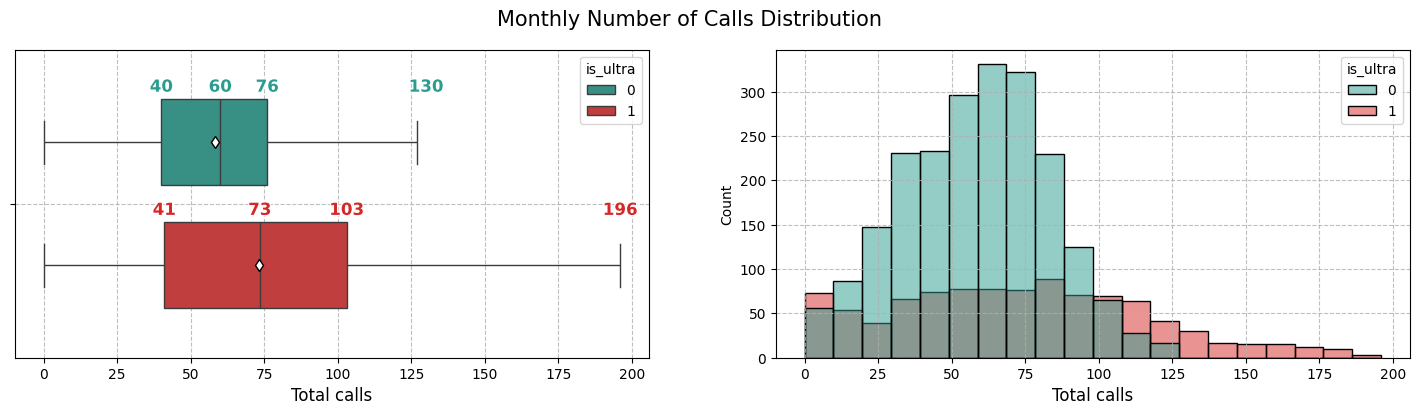

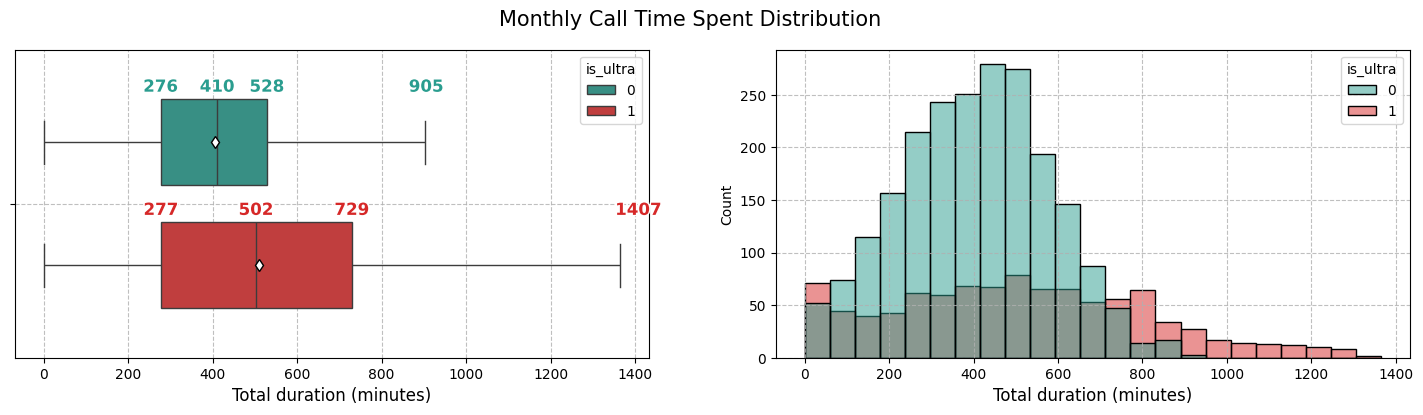

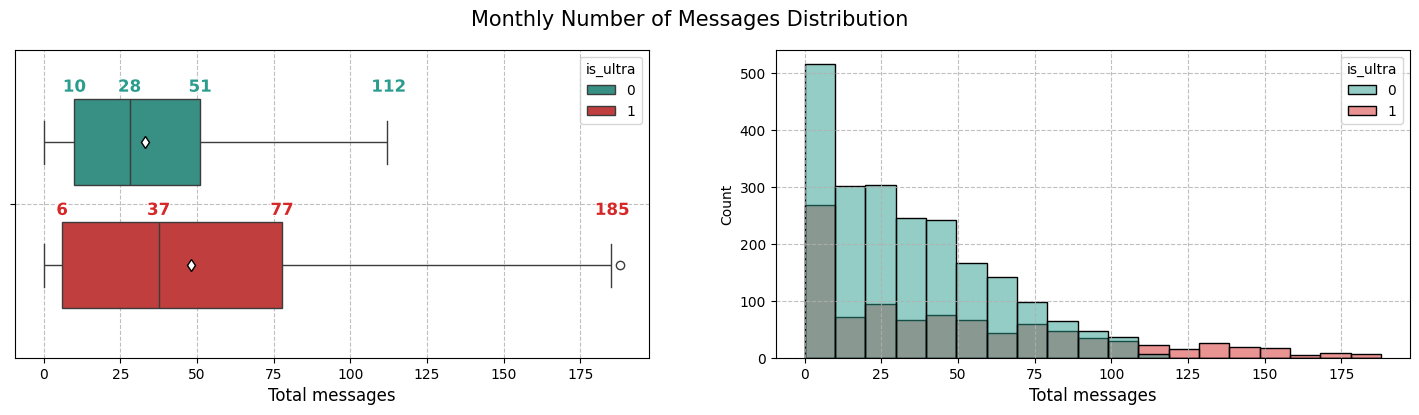

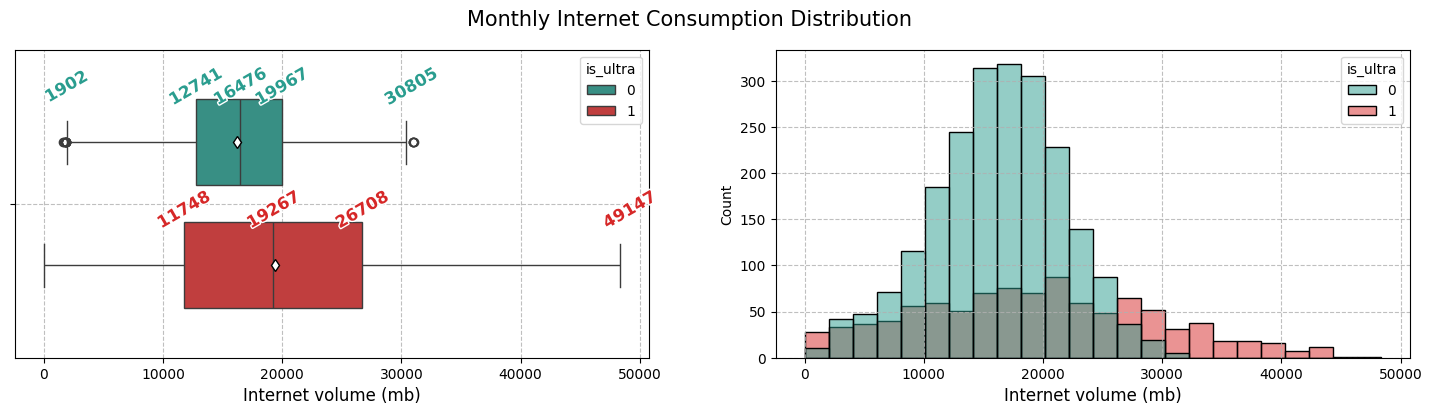

In [13]:
# Menampilkan distribusi data
box_hist_plot(src_cln, 'calls', (18,4), 'is_ultra', 10, 'Monthly Number of Calls Distribution', 'Total calls')
box_hist_plot(src_cln, 'minutes', (18,4), 'is_ultra', 60, 'Monthly Call Time Spent Distribution', 'Total duration (minutes)')
box_hist_plot(src_cln, 'messages', (18,4), 'is_ultra', 10, 'Monthly Number of Messages Distribution', 'Total messages')
box_hist_plot(src_cln, 'mb_used', (18,4), 'is_ultra', 2048, 'Monthly Internet Consumption Distribution', 'Internet volume (mb)', 30)

Masih ditemukan keberadaan *outlier* pada sejumlah fitur, yaitu pada fitur jumlah pesan dan konsumsi internet. Kita akan melakukan sejumlah iterasi hingga *outlier* berhasil ditangani seluruhnya.

In [14]:
# melakukan iterasi untuk pembersihan outlier
while len(src_cln)!=len(outlier_handling(df=src_cln, column=['calls','minutes','messages','mb_used'], class_by='is_ultra')):
    src_cln = outlier_handling(df=src_cln, column=['calls','minutes','messages','mb_used'], class_by='is_ultra')

# menampilkan data
print(src_cln.shape)
src_cln.head(5)

(3128, 5)


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Berikut akan ditampilkan kembali distribusi data untuk seluruh fitur agar memastikan *outlier* telah dikeluarkan dari dataset.

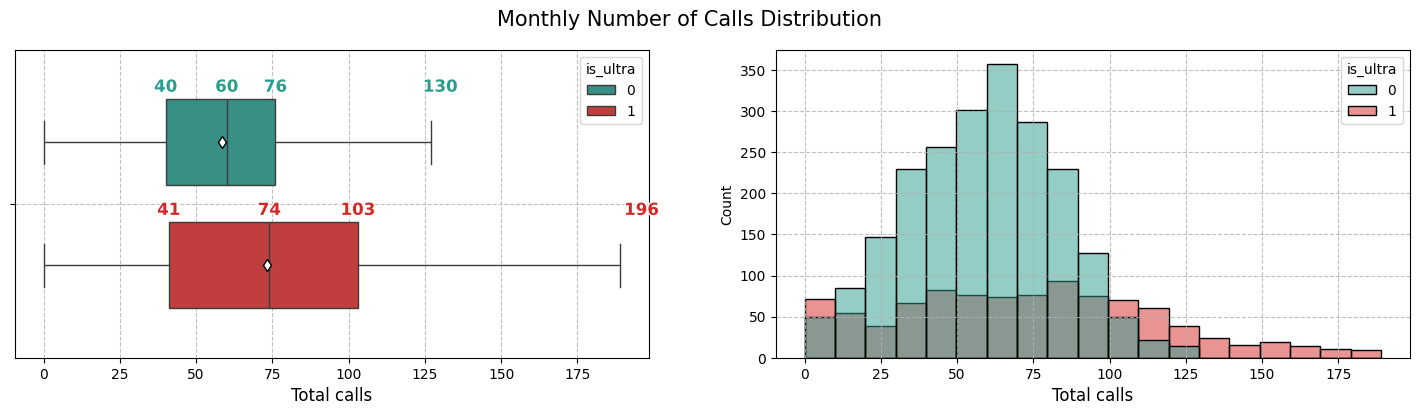

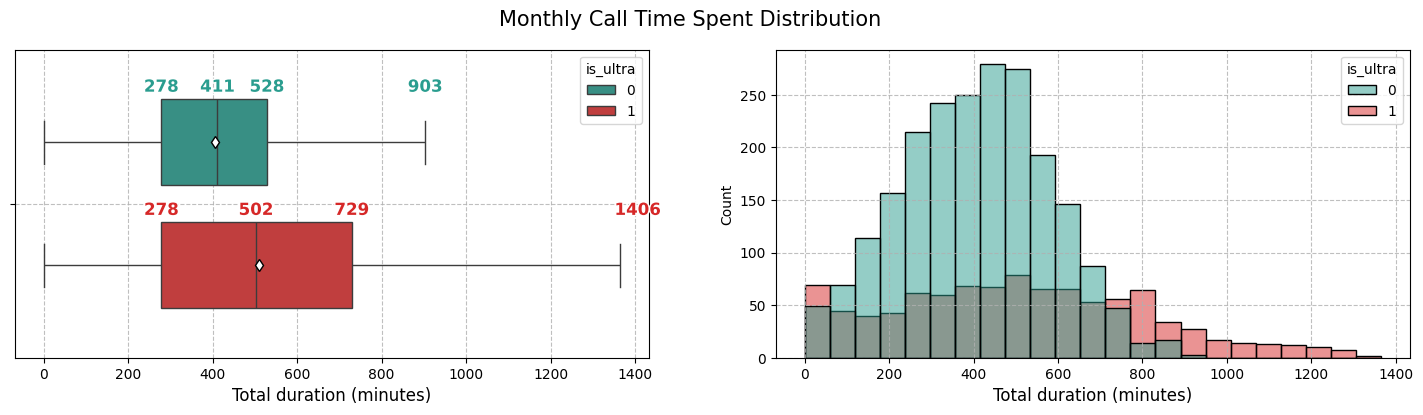

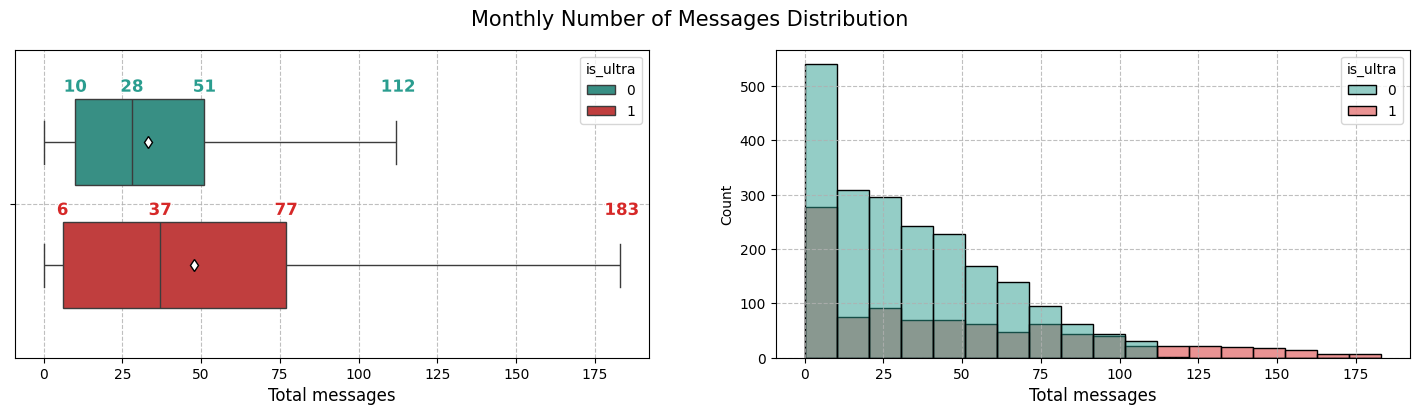

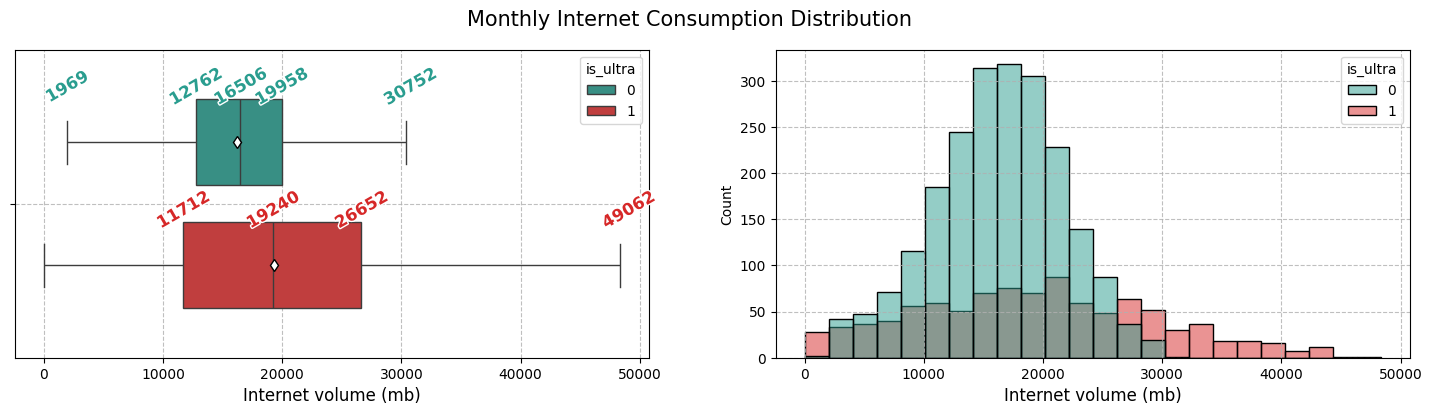

In [15]:
# Menampilkan distribusi data
box_hist_plot(src_cln, 'calls', (18,4), 'is_ultra', 10, 'Monthly Number of Calls Distribution', 'Total calls')
box_hist_plot(src_cln, 'minutes', (18,4), 'is_ultra', 60, 'Monthly Call Time Spent Distribution', 'Total duration (minutes)')
box_hist_plot(src_cln, 'messages', (18,4), 'is_ultra', 10, 'Monthly Number of Messages Distribution', 'Total messages')
box_hist_plot(src_cln, 'mb_used', (18,4), 'is_ultra', 2048, 'Monthly Internet Consumption Distribution', 'Internet volume (mb)', 30)

*Outlier* telah berhasil dikeluarkan. Saat ini tersisa sebanyak 3128 baris data dimana sebelumnya sebanyak 3214 baris data. Terjadi pengurangan observasi sebesar 86 data (2.7% data awal).

Pada bagian sebelumnya, diketahui bahwa proporsi data pengguna paket **Smart** dan **Ultra** tidak seimbang dengan proporsi 31% untuk paket **Ultra** dan 69% untuk paket **Smart**. Disebabkan pentingnya proporsi tersebut dalam melakukan *training* model, maka kita perlu melihat kembali proporsi data setelah *outlier* dikeluarkan.

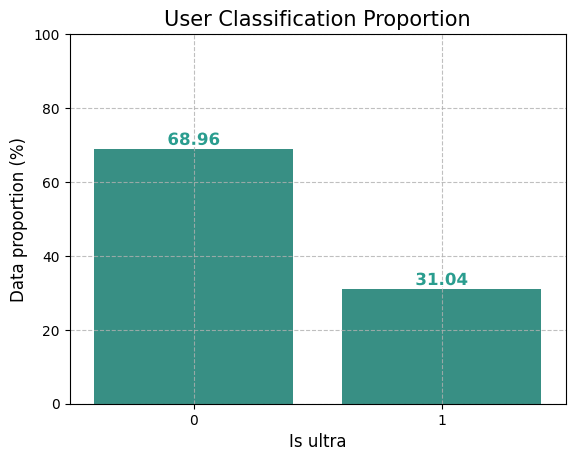

In [16]:
# menampilkan barplot proporsi data pada masing-masing class
fig, ax1 = plt.subplots()
sns.countplot(ax=ax1, data=src_cln, x=src_cln['is_ultra'].astype('str'), stat="percent", color='#2A9D8F')

for i in ax1.patches:
    ax1.text(i.get_x()+i.get_width()/2, i.get_height(), np.round(i.get_height(),2), ha='center', va='bottom', c='#2A9D8F', 
             weight='bold', size=12, path_effects=[pe.withStroke(linewidth=2, foreground='white')])

ax1.set_ylim(0,100)
ax1.grid(alpha=0.8, linestyle='dashed')
ax1.set_xlabel("Is ultra", size=12)
ax1.set_ylabel("Data proportion (%)", size=12)
ax1.set_title("User Classification Proportion", size=15)
plt.show()

Setelah dilakukan penanganan *outlier* pada dataset, ternyata proporsi data antara pengguna paket **Ultra** maupun **Smart** tidak mengalami perubahan. Proporsi sebesar 69% untuk paket **Smart** dan 31% untuk paket **Ultra**.

### <a id='toc5_1_2_'></a>[**Membagi Dataset**](#toc0_)

Saat ini, kita hanya memiliki satu buah dataset yang kita sebut sebagai dataset sumber. Untuk Proyek ini, kita membutuhkan 3 buah dataset, yaitu **training dataset**, **validation dataset** dan **testing dataset**. Kita akan membagi dataset sumber tersebut menjadi 3 bagian dengan rasio 3:1:1. Sebanyak 60% dataset sumber akan dijadikan **training dataset**, 20% dataset sumber akan dijadikan **validation dataset**, dan 20% sisanya adalah **testing dataset**.

Sebelum melakukan pembagian dataset sumber, terlebih dahulu akan dilakukan pemisahan dataset antara fitur dan target untuk pembangunan model di proyek ini.

In [17]:
# memisahkan antara tabel fitur dan target
feature = src_cln.drop("is_ultra", axis='columns')
target = src_cln["is_ultra"]

Data fitur dan target telah dipisahkan. Berikutnya akan dilakukan pembagian dataset menjadi 3 bagian. Pembagian dilakukan secara acak menggunakan metode *stratified sampling* sehingga proporsi pengguna paket **Ultra** dan **Smart** setara di seluruh dataset.

In [18]:
# membagi data menjadi 3 bagian
train_feature, val_feature, train_target, val_target = train_test_split(feature, target, test_size=0.4, stratify=target, random_state=12345)
val_feature, test_feature, val_target, test_target = train_test_split(val_feature, val_target, test_size=0.5, stratify=val_target, random_state=12345)

In [19]:
# meanmpilkan ukuran dataset
print(f"""
Ukuran training dataset \t>> feature: {train_feature.shape}, target: {train_target.shape}
Ukuran validation dataset \t>> feature: {val_feature.shape}, target: {val_target.shape}
Ukuran testing dataset \t\t>> feature: {test_feature.shape}, target: {test_target.shape}
      """)


Ukuran training dataset 	>> feature: (1876, 4), target: (1876,)
Ukuran validation dataset 	>> feature: (626, 4), target: (626,)
Ukuran testing dataset 		>> feature: (626, 4), target: (626,)
      


Data telah dibagi menjadi 3 bagian dengan rasio 3:1:1. Sebelum melakukan pelatihan model, kita perlu memastikan apakah proporsi pengguna paket **Ultra** dan **Smart** pada masing-masing dataset memiliki proporsi yang setara atau tidak. Berikut barplot yang menunjukan proporsi tersebut.

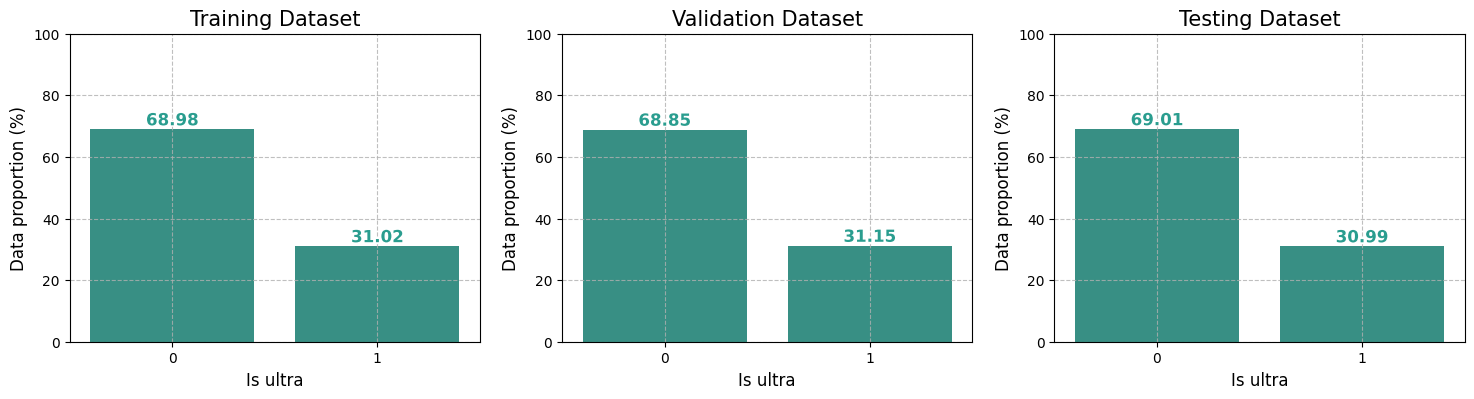

In [20]:
# menampilkan barplot proporsi data pada masing-masing class untuk setiap dataset
fig, ax1 = plt.subplots(ncols=3, figsize=(18,4))
sns.countplot(ax=ax1[0], x=train_target.astype('str'), stat="percent", color='#2A9D8F')
sns.countplot(ax=ax1[1], x=val_target.astype('str'), stat="percent", color='#2A9D8F')
sns.countplot(ax=ax1[2], x=test_target.astype('str'), stat="percent", color='#2A9D8F')

for a in range(3):
    for i in ax1[a].patches:
        ax1[a].text(i.get_x()+i.get_width()/2, i.get_height(), np.round(i.get_height(),2), ha='center', va='bottom', c='#2A9D8F', 
                weight='bold', size=12, path_effects=[pe.withStroke(linewidth=2, foreground='white')])

        ax1[a].set_ylim(0,100)
        ax1[a].grid(alpha=0.8, linestyle='dashed')
        ax1[a].set_xlabel("Is ultra", size=12)
        ax1[a].set_ylabel("Data proportion (%)", size=12)
ax1[0].set_title("Training Dataset", size=15)
ax1[1].set_title("Validation Dataset", size=15)
ax1[2].set_title("Testing Dataset", size=15)
plt.show()

Dari barplot di atas, terlihat bahwa proporsi pengguna paket **Smart** atau **Ultra** setara di seluruh dataset, yaitu dengan proporsi 69% pengguna paket **Smart** dan 31% penggunna paket **Ultra**.

## <a id='toc5_2_'></a>[2) *Model Tuning*](#toc0_)

Pada tahap ini, kita akan melakukan *model tuning* pada sejumlah model tugas klasifikasi. Model yang akan kita uji coba, yaitu *Decision Tree Classifier*, *Random Forest Classifier* dan *Logistic Regression*. Kita akan melakukan *model tuning* menggunakan model-model tersebut agar **memperoleh satu model yang dapat mencapai tingkat akurasi tertinggi**. Berdasarkan tujuan proyek, batas akurasi minimum yang harus dicapai yaitu sebesar 75%.

Terdapat hal yang perlu diperhatikan dalam melakukan *model tuning* pada proyek ini. Pada pembahasan sebelumnya, diketahui bahwa proporsi pengguna paket **Ultra** dan **Smart** tidak seimbang sehingga diperlukannya pengaturan *hyperparameter* yang dapat mengompensasi hal tersebut.

### <a id='toc5_2_1_'></a>[**Decision Tree Classifier**](#toc0_)

Pada model dengan metode *Decision Tree Classfier*, permasalahan yang sering timbul adalah **overfitting** akibat kedalaman pohon yang terlalu dalam. Oleh karena itu, untuk mencari pengaturan model yang tepat maka *tuning* akan dilakukan pada *hyperparameter* seperti *`min_samples_split`*, *`min_samples_leaf`* dan *`max_depth`*.

Akibat proporsi data yang tidak seimbang antara pengguna paket **Ultra** dan **Smart**, maka perlu dilakukannya pengaturan *hyperparameter* pada *`class_weight`* agar bernilai `"balanced"`.

In [21]:
# melakukan model tuning pada Decision Tree Classifier
max_depth_combination = range(1,16)
min_samples_split_comb = range(2,10)
min_samples_leaf_comb = range(1,11)

# parameter tuning
best_model_dt = None
best_max_depth = 0
best_min_samples_split = 0
best_min_samples_leaf = 0
best_accu = 0

# iterasi model
for max_depth in max_depth_combination:
    for min_sample_split in min_samples_split_comb:
        for min_samples_leaf in min_samples_leaf_comb:
            model_dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf,min_samples_split=min_sample_split,max_depth=max_depth, 
                                            random_state=12345, class_weight="balanced")
            model_dt.fit(train_feature, train_target)
            predictions = model_dt.predict(val_feature)
            accu = accuracy_score(val_target, predictions)
            if accu>best_accu:
                best_model_dt = model_dt
                best_max_depth = max_depth
                best_min_samples_split = min_sample_split
                best_min_samples_leaf = min_samples_leaf
                best_accu = accu

print(f"""
Best_max_depth \t\t: {best_max_depth}
Best_min_samples_split \t: {best_min_samples_split}
Best_min_samples_leaf \t: {best_min_samples_leaf}
Best Accuracy \t\t: {best_accu}
      """)


Best_max_depth 		: 6
Best_min_samples_split 	: 2
Best_min_samples_leaf 	: 9
Best Accuracy 		: 0.8354632587859425
      


### <a id='toc5_2_2_'></a>[**Random Forest Classifier**](#toc0_)

Model *Random Forest Classifier* memiliki performa yang lebih baik dalam penanganan **overfiting** dibandingkan *Decision Tree Classifier*. Terdapat sejumlah *hyperparameter* yang akan di-*tuning* untuk mencapai model yang terbaik pada metode ini, seperti *`n_estimators`*,*`min_samples_split`*, *`min_samples_leaf`* dan *`max_depth`*

Akibat proporsi data yang tidak seimbang antara pengguna paket **Ultra** dan **Smart**, maka perlu dilakukannya pengaturan *hyperparameter* pada *`class_weight`* agar bernilai `"balanced"`.

In [22]:
# melakukan model tuning pada Random Forest Classifier
n_estimators_comb = range(1,11)
max_depth_combination = range(1,21)
min_samples_split_comb = range(2,6)
min_samples_leaf_comb = range(1,6)

# parameter tuning
best_model_rf = None
best_n_estimators = 0
best_max_depth = 0
best_min_samples_split = 0
best_min_samples_leaf = 0
best_accu = 0

# iterasi model
for n_estimators in n_estimators_comb:
    for max_depth in max_depth_combination:
        for min_sample_split in min_samples_split_comb:
            for min_samples_leaf in min_samples_leaf_comb:
                model_rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf,min_samples_split=min_sample_split,
                                                  max_depth=max_depth, n_estimators=n_estimators,
                                                  random_state=12345, class_weight="balanced")
                model_rf.fit(train_feature, train_target)
                predictions = model_rf.predict(val_feature)
                accu = accuracy_score(val_target, predictions)
                if accu>best_accu:
                    best_model_rf = model_rf
                    best_n_estimators = n_estimators
                    best_max_depth = max_depth
                    best_min_samples_split = min_sample_split
                    best_min_samples_leaf = min_samples_leaf
                    best_accu = accu

print(f"""
Best_n_estimators \t: {best_n_estimators}
Best_max_depth \t\t: {best_max_depth}
Best_min_samples_split \t: {best_min_samples_split}
Best_min_samples_leaf \t: {best_min_samples_leaf}
Best Accuracy \t\t: {best_accu}
      """)


Best_n_estimators 	: 9
Best_max_depth 		: 7
Best_min_samples_split 	: 3
Best_min_samples_leaf 	: 1
Best Accuracy 		: 0.8450479233226837
      


### <a id='toc5_2_3_'></a>[**Logistic Regression**](#toc0_)

Pada *model tuning* menggunakan model *Logistic Regression*, terdapat sejumlah *hyperparameter* yang dapat diatur untuk meningkatkan kualitas model pada proyek ini, diantaranya *`solver`*, *`max_iter`* (jumlah iterasi maksimum), nilai *`C`* (*Regularization Parameter*), dan *`Tol`* (parameter konvergensi).

*Traininng Dataset* yang kita miliki berukuran kecil sehingga *solver* yang tepat untuk digunakan, yaitu `"liblinear"`. Akibat proporsi data yang tidak seimbang antara pengguna paket **Ultra** dan **Smart**, maka perlu dilakukannya pengaturan *hyperparameter* pada *`class_weight`* agar bernilai `"balanced"`.

In [23]:
# melakukan model tuning pada Logistic Regression
max_iter_comb = [100,150,200]
c_comb = [0.5, 0.52,0.54,0.56,0.58,0.6]
tol_comb = [0.001, 0.0001, 0.00001, 0.000001, 0.0000001]

# parameter tuning
best_model_lr = None
best_max_iter = 0
best_c_value = 0
best_tolerance = 0
best_accu = 0

# iterasi model
for max_iter in max_iter_comb:
    for c_value in c_comb:
        for tolerance in tol_comb:
            model_lr = LogisticRegression(max_iter=max_iter, C=c_value, tol=tolerance,
                                          random_state=12345, class_weight="balanced", solver="liblinear")
            model_lr.fit(train_feature, train_target)
            predictions = model_lr.predict(val_feature)
            accu = accuracy_score(val_target, predictions)
            if accu>best_accu:
                best_model_lr = model_lr
                best_max_iter = max_iter
                best_c_value = c_value
                best_tolerance = tolerance
                best_accu = accu

print(f"""
Best_max_iter \t: {best_max_iter}
Best_c_value \t: {best_c_value}
Best_tolerance \t: {best_tolerance}
Best Accuracy \t: {best_accu}
      """)


Best_max_iter 	: 100
Best_c_value 	: 0.52
Best_tolerance 	: 1e-06
Best Accuracy 	: 0.6198083067092651
      


## <a id='toc5_3_'></a>[3) *Model Testing*](#toc0_)

Sejumlah model telah di-*tuning* sehingga menghasilkan performa terbaiknya. Dari 3 model yang di-*tuning*, yakni *Decision Tree Classifier*, *Random Forest Classifier* dan *Logistic Regression*, model dengan akurasi terbaik pada prediksi *validation dataset* yaitu *Random Forest Classifier* dengan akurasi sebesar 84.5%, kemudian disusul oleh *Decision Tree Classifier* dengan akurasi sebesar 83.5%, dan yang terendah yaitu *Logistic Regression* dengan akurasi sebesar 62%.




Oleh karena itu, untuk pengujian/prediksi *testing dataset*, model yang akan digunakan adalah model *Random Forest Classifier* dengan pengaturan yang paling optimal. Pada proses iterasi sebelumnya, kondisi optimal dapat dicapai dengan mengatur sejumlah *hyperparameter* dengan nilai berikut:

* `n_estimators` = 9
* `max_depth` = 7
* `min_samples_split` = 3
* `min_samples_leaf` = 1
* `class_weight` = "balanced"

In [24]:
# Melakukan pengujian model yang optimal pada testing dataset
# Instances Object RandomForestClassifier
final_model = RandomForestClassifier(min_samples_leaf=1 ,min_samples_split=3,
                                    max_depth=7, n_estimators=9,
                                    random_state=12345, class_weight="balanced")
# Melatih model
final_model.fit(train_feature, train_target)

# menghitung akurasi prediksi pada training, validation dan testing dataset
accu_train = final_model.score(train_feature, train_target)
accu_val = final_model.score(val_feature, val_target)
accu_test = final_model.score(test_feature, test_target)

print(f"""
Akurasi model pada training dataset \t: {accu_train:.2%}
Akurasi model pada validation dataset \t: {accu_val:.2%}
Akurasi model pada testing dataset \t: {accu_test:.2%}
      """)


Akurasi model pada training dataset 	: 86.62%
Akurasi model pada validation dataset 	: 84.50%
Akurasi model pada testing dataset 	: 79.07%
      


Dari hasil di atas, terlihat bahwa model telah optimal dan tidak terjadi **overfittinng** pada model tersebut yang terlihat dari akurasi pada *training dataset* dan *validation dataset* yang tidak terpaut jauh. Selain itu, pada pengujian menggunakan *testing dataset* menghasilkan akurasi sebesar 79% yang berarti kita telah berhasil mencapai salah satu tujuan pada proyek ini, yaitu diperoleh model dengan akurasi minimum sebesar 75%.

# <a id='toc6_'></a>[**F. Kesimpulan**](#toc0_)

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Conclusions</div><br>
<div style="margin-left:1%; width:97%; text-align:justify">

Tujuan yang ingin dicapai pada proyek ini adalah menghasilkan model yang dapat memberikan rekomendasi paket seluler yang sesuai dengan **akurasi 75%** melalui sejumlah *feature* yang terdapat pada data perilaku pengguna. Berdasarkan sejumlah temuan dan analisis yang telah dilakukan, berikut adalah kesimpulan dari analisis pada proyek ini.

* Proporsi pengguna paket **Ultra** hanya 31% dataset utama sedangkan 69% sisannya adalah data pengguna paket **Smart**.
* Distribusi data konsumsi layanan seluler pada pengguna paket **Ultra** memiliki jangkauan yang lebih lebar dari pada pengguna paket **Smart**.
* Secara keseluruhann, pengguna paket **Ultra** menunjukkan tingkat konsumsi layanan seluler yang lebih tinggi dari pada pengguna paket **Smart**.
* Dari hasil *model training* dan *model tuning* diperoleh kesimpulan bahwa model *Random Forest Classifier* menghasilkan akurasi paling tinggi dari pada model lainnya, yaitu sebesar 84.5%. Pada pengujian menggunakan *testing dataset*, model *Random Forest Classifier* yang telah dioptimasi dapat memprediksi secara tepat dengan akurasi sebesar 79.1%.

</div>